In [5]:
import pandas as pd
import numpy as np

In [7]:
import os
print(os.getcwd())


c:\Users\Moringa School\Desktop\Phase2-Project


In [17]:
df = pd.read_csv(r'Data/rt.movie_info.tsv', sep='\t')
df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [19]:
# Step 1: Standardize column names
df.columns = (
    df.columns
    .str.strip()                # Remove leading/trailing spaces
    .str.lower()                # Convert to lowercase
    .str.replace(' ', '_')      # Replace spaces with underscores
)

# Preview the updated column names
print("✅ Cleaned column names:")
print(df.columns.tolist())

# Quick glance at the data after renaming
df.head()


✅ Cleaned column names:
['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [20]:
# Convert strings like "104 minutes" → 104 (integer)

# Remove the word "minutes" and any surrounding spaces, then convert to numeric
df['runtime'] = (
    df['runtime']
    .astype(str)
    .str.replace('minutes', '', regex=False)
    .str.strip()
    .replace('', None)
)

# Convert to numeric (will turn non-convertible values into NaN)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Check the result
print("✅ 'runtime' column cleaned and converted to integer:")
print(df['runtime'].head(10))
print("\nNumber of missing runtime values:", df['runtime'].isna().sum())


✅ 'runtime' column cleaned and converted to integer:
0    104.0
1    108.0
2    116.0
3    128.0
4    200.0
5     95.0
6     82.0
7    123.0
8    117.0
9    108.0
Name: runtime, dtype: float64

Number of missing runtime values: 30


In [21]:
# Convert 'theater_date' and 'dvd_date' to datetime objects

date_columns = ['theater_date', 'dvd_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check conversion
print(" Date columns converted to datetime:")
print(df[date_columns].dtypes)
print("\nSample of cleaned date columns:")
print(df[date_columns].head(10))


 Date columns converted to datetime:
theater_date    datetime64[ns]
dvd_date        datetime64[ns]
dtype: object

Sample of cleaned date columns:
  theater_date   dvd_date
0   1971-10-09 2001-09-25
1   2012-08-17 2013-01-01
2   1996-09-13 2000-04-18
3   1994-12-09 1997-08-27
4          NaT        NaT
5   2000-03-03 2000-07-11
6   2002-01-11 2002-06-18
7   2006-04-27 2007-10-02
8   2010-06-30 2010-11-09
9   1995-06-09 1999-07-27


In [22]:
# Convert strings like "$600,000" → 600000 (float)

# First, combine 'currency' and 'box_office' if you want to preserve currency type
# (Optional — can be skipped if all are in dollars)
df['currency'] = df['currency'].fillna('$')

# Remove currency symbols, commas, and spaces, then convert to numeric
df['box_office'] = (
    df['box_office']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)  # Keep only numbers and decimal points
    .replace('', None)
)

# Convert to float
df['box_office'] = pd.to_numeric(df['box_office'], errors='coerce')

# Check the result
print("'box_office' column cleaned and converted to numeric:")
print(df[['currency', 'box_office']].head(10))
print("\nNumber of missing box_office values:", df['box_office'].isna().sum())


'box_office' column cleaned and converted to numeric:
  currency  box_office
0        $         NaN
1        $    600000.0
2        $         NaN
3        $         NaN
4        $         NaN
5        $         NaN
6        $  41032915.0
7        $    224114.0
8        $    134904.0
9        $         NaN

Number of missing box_office values: 1220


In [23]:
df['box_office'] = pd.to_numeric(df['box_office'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
df['box_office'] = df['box_office'].fillna(df['box_office'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())


In [24]:
categorical_cols = ['director', 'writer', 'studio', 'genre']

for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')


In [25]:
date_cols = ['theater_date', 'dvd_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())  # median date


In [26]:
df['box_office'] = df['box_office'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['box_office'] = pd.to_numeric(df['box_office'], errors='coerce')


In [29]:
df.duplicated().value_counts()

False    1560
Name: count, dtype: int64

In [30]:
df.isna().sum()

id               0
synopsis        62
rating           3
genre            0
director         0
writer           0
theater_date     0
dvd_date         0
currency         0
box_office       0
runtime          0
studio           0
dtype: int64

In [34]:
df['synopsis'] = df['synopsis'].fillna('None.')
df['rating'] = df['rating'].fillna('Not Rated')

In [35]:
df.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [36]:
df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,14141054.5,104.0,Unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,14141054.5,116.0,Unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,14141054.5,128.0,Unknown
4,7,No synopsis available.,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1997-01-01,2004-06-01,$,14141054.5,200.0,Unknown
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,$,14141054.5,95.0,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,2002-06-18,$,41032915.0,82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,2007-10-02,$,224114.0,123.0,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,$,134904.0,117.0,Unknown
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,1995-06-09,1999-07-27,$,14141054.5,108.0,Unknown


In [37]:
df.to_csv('Data/rt_movie_info_cleaned.csv', index=False)

In [38]:
df['box_office'].describe()
df['runtime'].describe()
df['rating'].value_counts()
df['genre'].value_counts()


genre
Drama                                                                                           151
Comedy                                                                                          110
Comedy|Drama                                                                                     80
Drama|Mystery and Suspense                                                                       67
Art House and International|Drama                                                                62
                                                                                               ... 
Action and Adventure|Art House and International|Drama|Horror|Mystery and Suspense                1
Comedy|Drama|Faith and Spirituality                                                               1
Comedy|Documentary|Television                                                                     1
Action and Adventure|Drama|Mystery and Suspense|Science Fiction and Fantasy|Special Interest  

In [39]:
genre_df = df.assign(genre=df['genre'].str.split('|')).explode('genre')

genre_revenue = genre_df.groupby('genre')['box_office'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
genre_revenue


,mean,median,count
genre,,,
Animation,3.114056e+07,14141054.5,47
Kids and Family,2.725101e+07,14141054.5,99
Science Fiction and Fantasy,2.657023e+07,14141054.5,172
Action and Adventure,2.454222e+07,14141054.5,366
Romance,2.137981e+07,14141054.5,198
Comedy,2.095730e+07,14141054.5,550
Mystery and Suspense,2.021004e+07,14141054.5,309
Drama,1.723595e+07,14141054.5,912
Horror,1.660826e+07,14141054.5,134


In [40]:
df.groupby('rating')['box_office'].mean().sort_values(ascending=False)


rating
PG-13        3.524044e+07
PG           2.213443e+07
G            1.671583e+07
R            1.661875e+07
Not Rated    1.414105e+07
NR           1.370081e+07
NC17         1.260219e+06
Name: box_office, dtype: float64

In [41]:
df['box_office'].corr(df['runtime'])


np.float64(0.09738331133320792)

In [43]:
from scipy.stats import f_oneway

grouped = [group['box_office'].values for _, group in genre_df.groupby('genre')]
f_oneway(*grouped)


F_onewayResult(statistic=np.float64(4.529080113814758), pvalue=np.float64(3.122931712018417e-11))

In [49]:
df = pd.read_csv(r'Data\rt_movie_info_cleaned.csv')
df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,14141054.5,104.0,Unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,14141054.5,116.0,Unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,14141054.5,128.0,Unknown
4,7,No synopsis available.,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1997-01-01,2004-06-01,$,14141054.5,200.0,Unknown


C:\Users\Moringa School\AppData\Local\Temp\ipykernel_17476\569783514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_box.values, y=genre_box.index, palette='viridis')


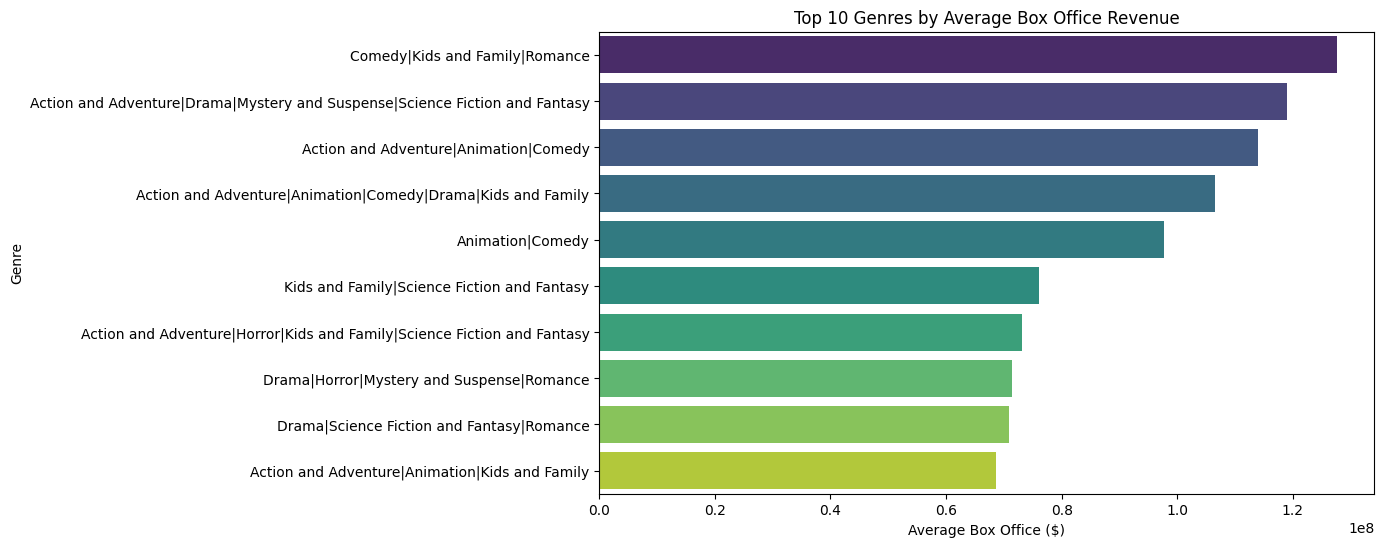

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Top performing genres
genre_box = df.groupby('genre')['box_office'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_box.values, y=genre_box.index, palette='viridis')
plt.title('Top 10 Genres by Average Box Office Revenue')
plt.xlabel('Average Box Office ($)')
plt.ylabel('Genre')
plt.show()

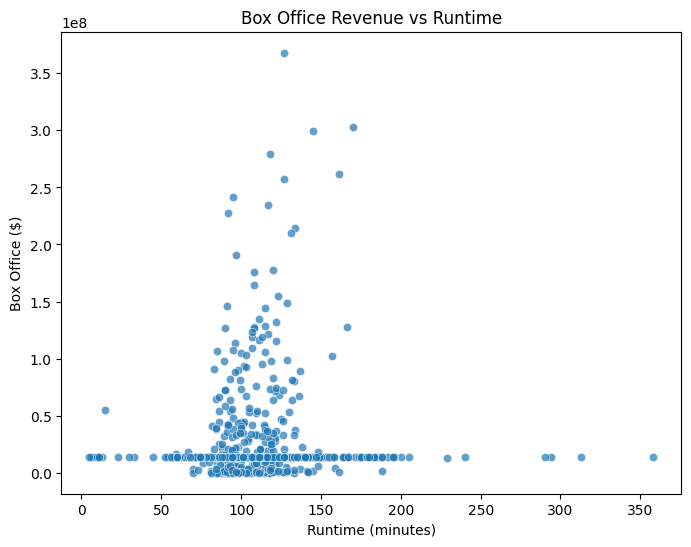

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='runtime', y='box_office', data=df, alpha=0.7)
plt.title('Box Office Revenue vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office ($)')
plt.show()


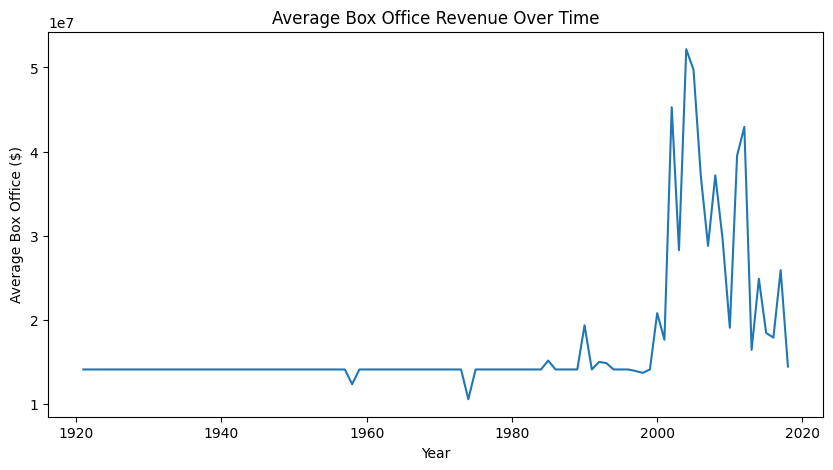

In [65]:
#  Average Box Office Over Time
df['year'] = pd.to_datetime(df['theater_date'], errors='coerce').dt.year

yearly = df.groupby('year')['box_office'].mean().dropna()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.title('Average Box Office Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Average Box Office ($)')
plt.show()


C:\Users\Moringa School\AppData\Local\Temp\ipykernel_17476\2100934369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_studios.values, y=top_studios.index, palette='coolwarm')


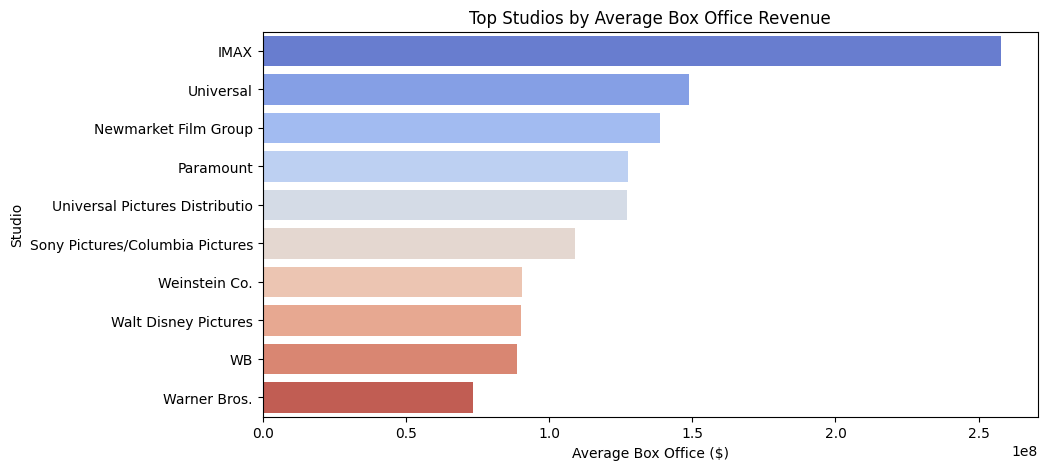

In [64]:
# Top Studios by Average Box Office
top_studios = df.groupby('studio')['box_office'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_studios.values, y=top_studios.index, palette='coolwarm')
plt.title('Top Studios by Average Box Office Revenue')
plt.xlabel('Average Box Office ($)')
plt.ylabel('Studio')
plt.show()


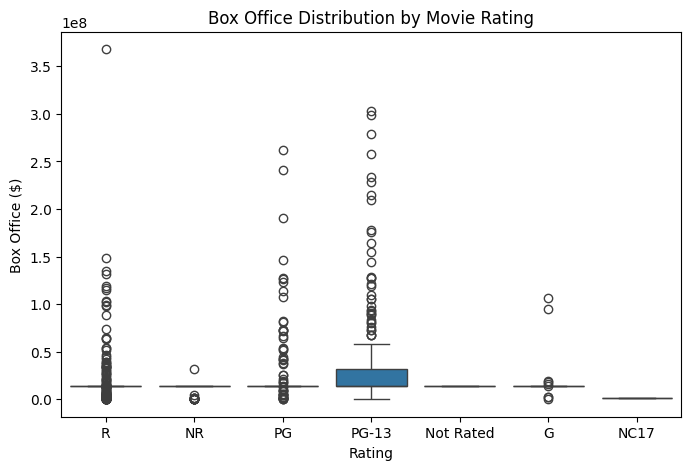

In [63]:
# Box Office by Rating (e.g. G, PG, R)
# Which audience rating performs best?
plt.figure(figsize=(8,5))
sns.boxplot(x='rating', y='box_office', data=df)
plt.title('Box Office Distribution by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Box Office ($)')
plt.show()


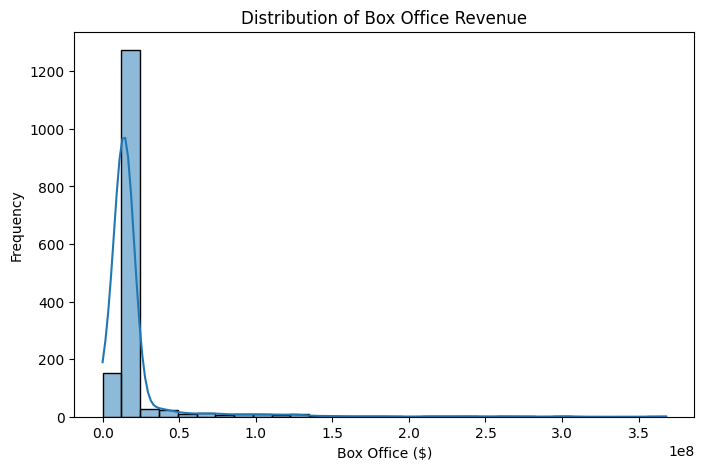

In [62]:
# Distribution of Box Office Revenue
# See how the earnings are spread — often highly skewed (a few blockbusters earn huge amounts).
plt.figure(figsize=(8,5))
sns.histplot(df['box_office'], bins=30, kde=True)
plt.title('Distribution of Box Office Revenue')
plt.xlabel('Box Office ($)')
plt.ylabel('Frequency')
plt.show()


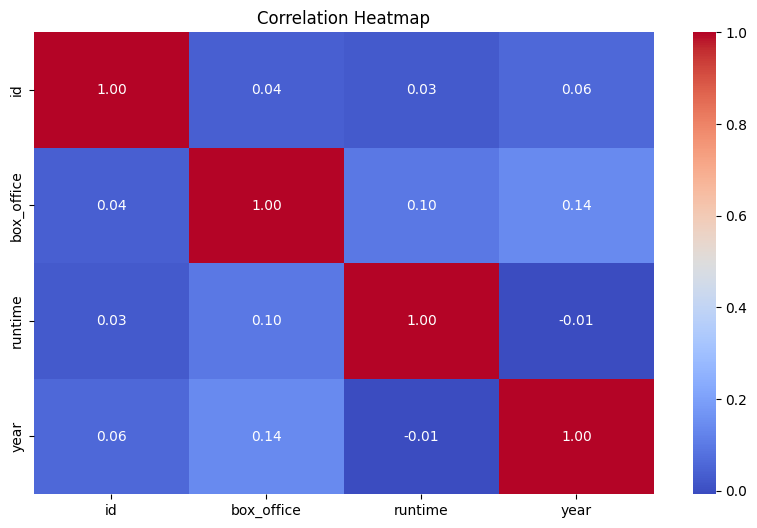

In [59]:
# Correlation Heatmap
# Identify which numeric variables are most related — e.g., does runtime or critic score correlate with box office?
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

